In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/audiomentations

/content/drive/MyDrive/audiomentations


###Please note, torch-audiomentations is a python library for augmenting audio tensors. Thus no inference and training models are required in this codebase.

In [1]:
!pip install torch_audiomentations

     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 15.0 MB/s eta 0:00:00
  Using cached librosa-0.10.0.post2-py3-none-any.whl (253 kB)
     ---------------------------------------- 59.6/59.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 172.3/172.3 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 32.6 MB/s eta 0:00:00
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
     ---------------------------------------- 8.3/8.3 MB 35.5 MB/s eta 0:00:00
     --------------------------------------- 14.8/14.8 MB 32.8 MB/s eta 0:00:00
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 61.6/61.6 kB 3.4 MB/s eta 0:00:00
  Using cached lazy_loade

# loading audio files(.wav)

In [46]:
import glob
import librosa
import torch
import torchaudio
import numpy as np
from IPython.display import Audio, display
from torch_audiomentations import Compose, Gain, PolarityInversion

paths_to_audio = glob.glob('audio_clean/*.wav')

audio = list()
for path_to_audio in paths_to_audio:
    track, _ = librosa.load(path_to_audio, sr=44100, dtype=np.float32)

    audio.append(track)
for audio_files in audio:
  display(Audio(audio_files, rate=44100, embed=True))

In [47]:
paths_to_audio

['audio_clean\\alarm_clock.wav',
 'audio_clean\\car_horn.wav',
 'audio_clean\\cat.wav',
 'audio_clean\\coughing.wav',
 'audio_clean\\thunder.wav']

### Applying torch Augmentations on 3D tensor.Torch-audiomentations expects three-dimensional input tensors, with dimension ordering like [batch_size, num_channels, num_samples]


In [48]:
# Convert waveform to tensor
def apply_augmentation(sample):
  # Initialize augmentation callable
  augmentation = Compose(
      transforms=[
          Gain(
              min_gain_in_db=-150.0,
              max_gain_in_db=50.0,
              p=0.75,
          ),
          PolarityInversion(p=0.5)
                ]
  )
  #Get shape as number of samples in tensor
  num_samples = sample.shape
  #numpy to torch tensor conversion
  sample = torch.from_numpy(sample)
  #reshaping torch tensor
  reshaped_tensor = sample.reshape(1,1,num_samples[0])
  # Apply augmentation. This varies the gain and polarity of (some of)
  # the audio snippets in the batch independently.
  return augmentation(reshaped_tensor, sample_rate=16000)

In [49]:
for files in audio:
  apply_augmentation(files)

In [50]:
aug_tensor = []
for files in audio:
  aug_tensor.append(apply_augmentation(files))

###Saving augmented torch tensors as .wav files

In [51]:
from scipy.io.wavfile import write
for index, tensor in enumerate(aug_tensor):
  name = paths_to_audio[index].replace(".wav", "_augmentedSample.wav")
  print("saving ...", name)
  write(name, 44100, tensor.numpy())

saving ... audio_clean\alarm_clock_augmentedSample.wav
saving ... audio_clean\car_horn_augmentedSample.wav
saving ... audio_clean\cat_augmentedSample.wav
saving ... audio_clean\coughing_augmentedSample.wav
saving ... audio_clean\thunder_augmentedSample.wav


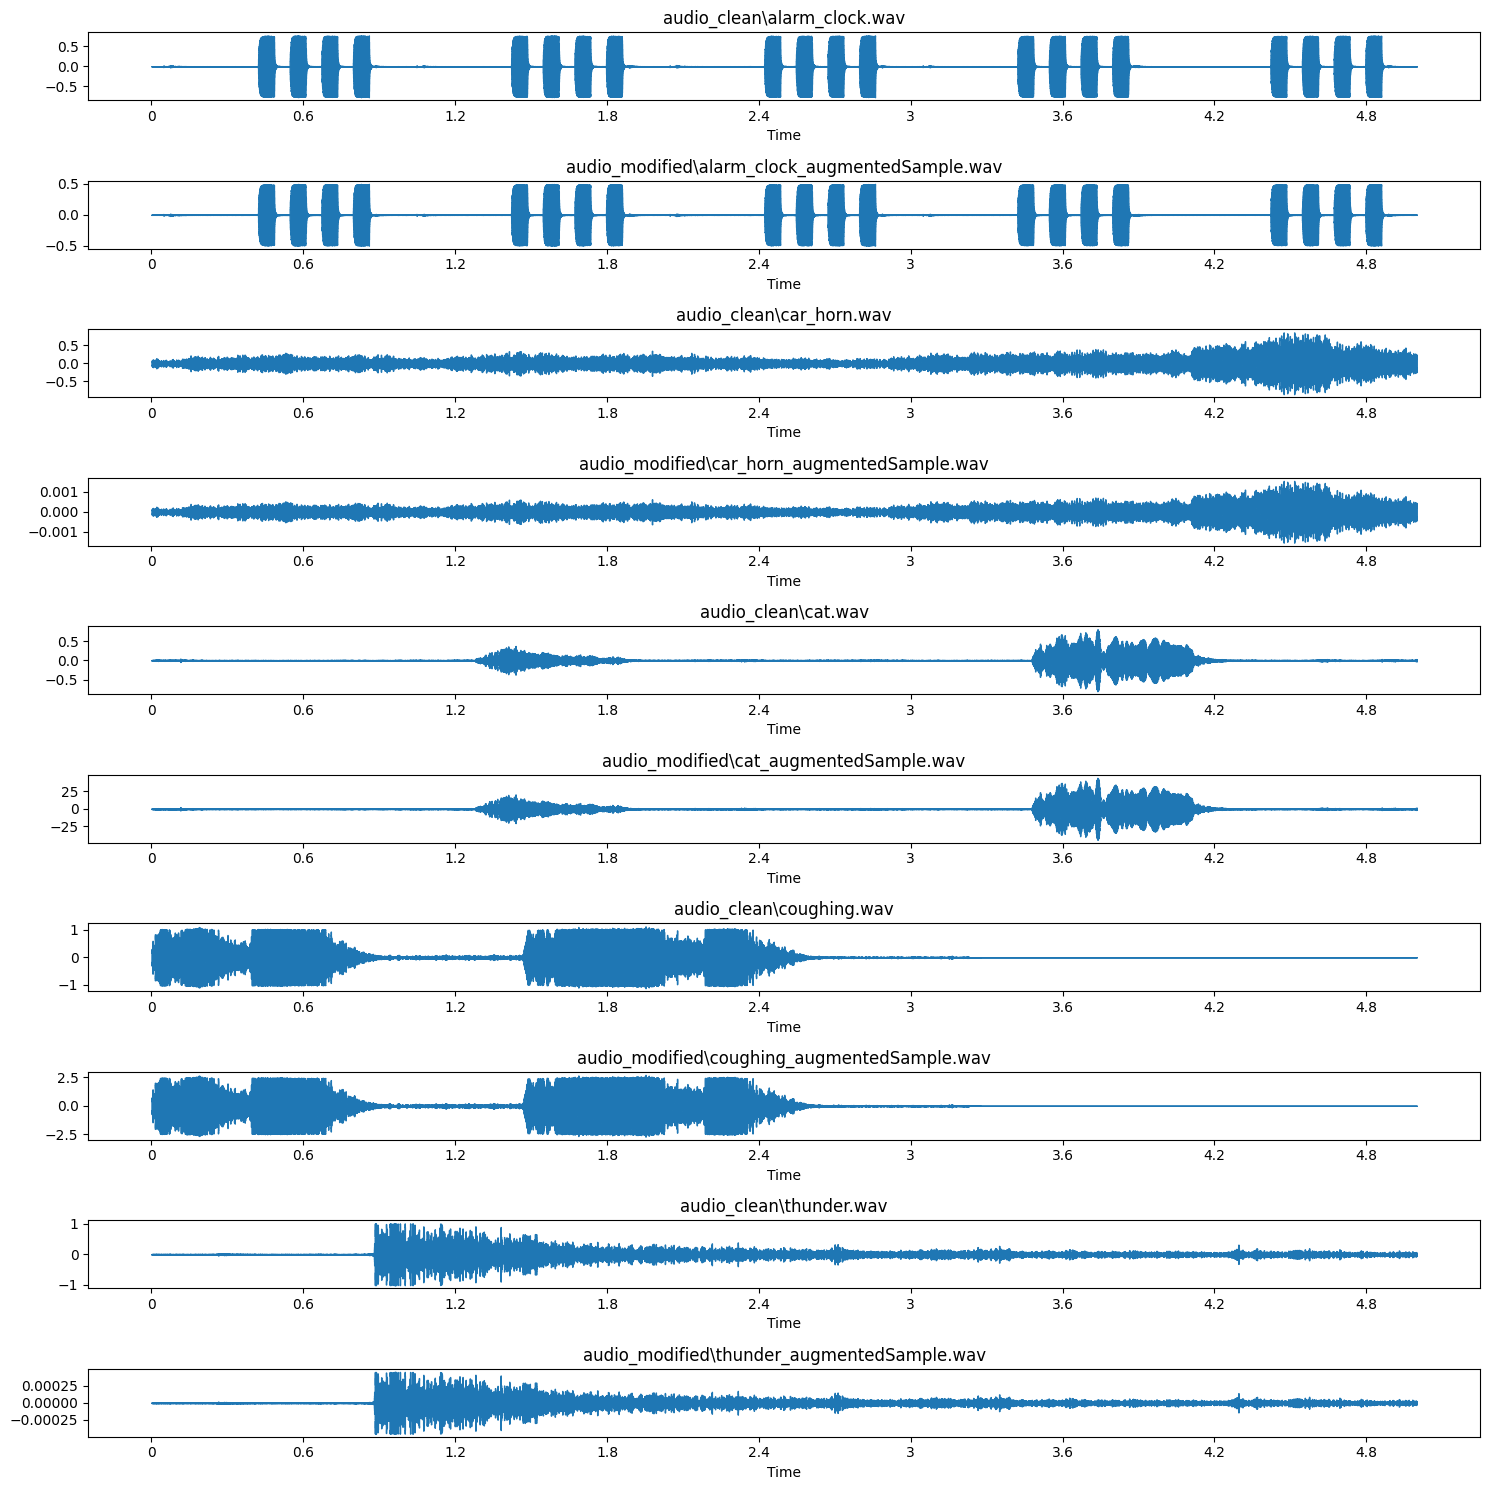

In [52]:
import librosa.display
fig, axs = plt.subplots(10,1, figsize=(15,15))
paths_to_audio_modified = glob.glob('audio_modified/*.wav')

index = 0
row =0
while row < 10:
    audio_file, sample_rate = librosa.load(paths_to_audio[index])
    librosa.display.waveshow(audio_file, sr=sample_rate, ax=axs[row])
    axs[row].set_title('{}'.format(paths_to_audio[index]))
    row+=1
    audio_file, sample_rate = librosa.load(paths_to_audio_modified[index])
    librosa.display.waveshow(audio_file, sr=sample_rate, ax=axs[row])
    axs[row].set_title('{}'.format(paths_to_audio_modified[index]))
    row+=1
    index += 1
fig.tight_layout()